## Predicting optimum number of clusters in 'Iris' dataset

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading the data

In [2]:
irs = pd.read_csv("Iris.csv")
irs.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Visualisation of Data

In [3]:
pa=irs.iloc[:,1:] #Taking every coloumn except ID column

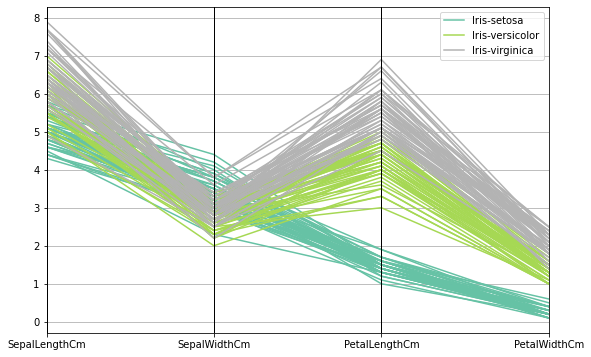

In [4]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(9,6))
parallel_coordinates (pa,'Species',colormap=plt.get_cmap("Set2"))
plt.show()

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

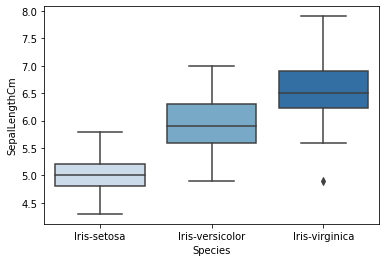

In [5]:
import seaborn as sns
sns.boxplot(x=pa["Species"],y=pa["SepalLengthCm"],palette="Blues")

In [6]:
iris=irs.drop(['Id'],axis=1)  #dropping the Id column as it is not required for classification
iris_df = iris.iloc[:,:-1]
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Finding the optimum number of clusters for KMeans 

In [7]:
x = iris_df.values

from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++",max_iter = 300,
                    n_init=10, random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

## Plotting the results into a line graph and seeing 'the elbow'

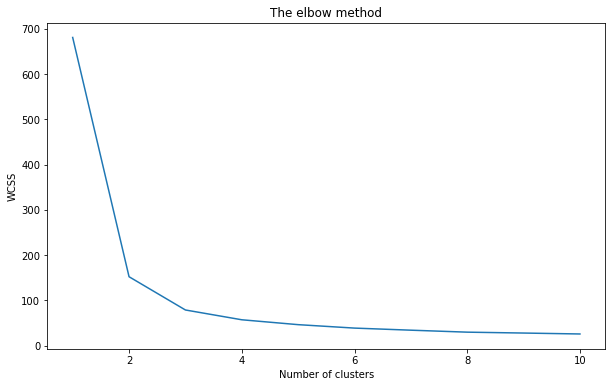

In [8]:
%matplotlib inline
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss)
plt.title("The elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

## The elbow point is at 3. So optimum number of clusters is taken as 3

## Applying KMeans to the dataset

In [9]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", max_iter = 300, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

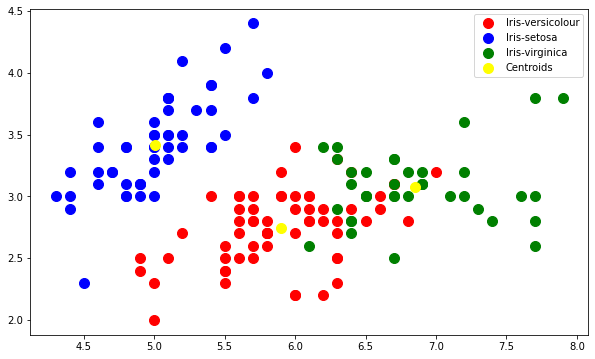

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1], s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

# cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()